In [1]:
#pip install -U tsfresh workalendar astral "featuretools[tsfresh]" sktime

  Using cached sktime-0.9.0-cp38-cp38-win_amd64.whl (4.8 MB)
  Using cached sktime-0.8.1-cp38-cp38-win_amd64.whl (4.8 MB)
INFO: pip is looking at multiple versions of dask to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask[dataframe] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of cloudpickle to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.5.4 which is incompatible.


# Ch 3 Preprocessing of Data

In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import numpy as np

# Transformations

In [4]:
#creating random numbers
np.random.seed(0)
pts = 10000
vals = np.random.lognormal(0, 1.0, pts)

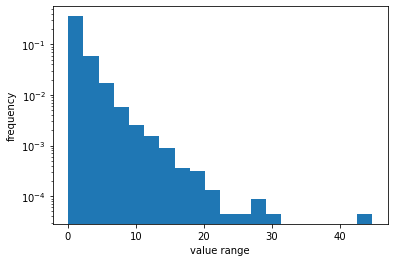

In [5]:
#create histogram
plt.hist(vals, bins=20, density=True)
plt.yscale("log")
plt.ylabel("frequency")
plt.xlabel("value range");

In [6]:
#to test for standardization using z-scores
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

vals_mm = minmax_scale(vals)
scaler = StandardScaler()
vals_ss = scaler.fit_transform(vals.reshape(-1, 1))
_, p = normaltest(vals_ss.squeeze())
print(f"significance: {p:.2f}")

significance: 0.00


In [7]:
#Null hypothesis: The sample comes from a normal distribution. 
#Alternative hypothesis: The sample is not normally distributed

#here, p-value is 0.00, which is significant, so we can reject the null hypothsesis
#and accept the alternative, that the sample is not normally distributed (which you can see in the histogram)

In [8]:
#using another test with the min and max transformation...
_, p = normaltest(vals_mm.squeeze())
print(f"significance: {p:.2f}")

significance: 0.00


In [9]:
#...And we reach the same conclusion: not normally distributed

In [10]:
#to use a log transformation
log_transformed = np.log(vals)
_, p = normaltest(log_transformed)
print(f"significance: {p:.2f}")

significance: 0.46


In [11]:
#When we do a log transformation, we can't reject the null hypothesis (that there is normal distribution)
# because the p-value, at 0.46, is not significant

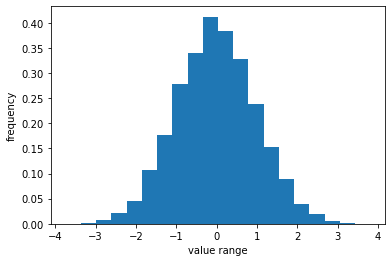

In [19]:
#to show a histogram of the log transformed data
plt.hist(log_transformed, bins=20, density=True)
plt.ylabel("frequency")
plt.xlabel("value range");

In [20]:
#apply Box-Cox transformation:
from scipy.stats import boxcox
vals_bc = boxcox(vals, 0.0)
_, p = normaltest(vals_bc)
print(f"significance: {p:.2f}")

significance: 0.46


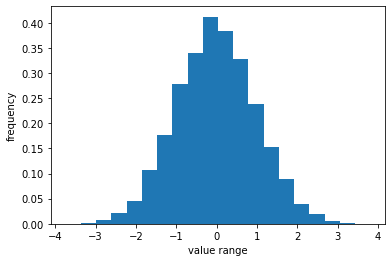

In [21]:
plt.hist(vals_bc, bins=20, density=True)
plt.ylabel("frequency")
plt.xlabel("value range");

In [ ]:
#Box-cox significance is 0.46 and the histogram is showing normal distribution